In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from autoencoder import *
import pandas as pd
from utl import *

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('machine-1-1.csv')
scalar = MinMaxScaler()
data = scalar.fit_transform(data)
X_train, X_test = train_test_split(data, test_size=.33)

In [3]:
input_dim = X_train.shape[1]
latent_dim = 4
epochs=50
batch_size=None

encoder = build_encoder(input_dim, latent_dim)
decoder = build_decoder(input_dim, latent_dim)
autoencoder = AutoEncoder(encoder, decoder)
autoencoder.compile()
history = autoencoder.fit(X_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
597/597 [==============================] - 1s 1ms/step - loss: 0.0945 - reconstruction_loss: 0.0052 - kl_loss: 0.1379
Epoch 2/50
597/597 [==============================] - 1s 1ms/step - loss: 0.0790 - reconstruction_loss: 3.9169e-04 - kl_loss: 0.0746
Epoch 3/50
597/597 [==============================] - 1s 1ms/step - loss: 0.0653 - reconstruction_loss: 2.9359e-04 - kl_loss: 0.0632
Epoch 4/50
597/597 [==============================] - 1s 1ms/step - loss: 0.0526 - reconstruction_loss: 2.0209e-04 - kl_loss: 0.0472
Epoch 5/50
597/597 [==============================] - 1s 1ms/step - loss: 0.0408 - reconstruction_loss: 1.5651e-04 - kl_loss: 0.0400
Epoch 6/50
597/597 [==============================] - 1s 1ms/step - loss: 0.0380 - reconstruction_loss: 1.4111e-04 - kl_loss: 0.0371
Epoch 7/50
597/597 [==============================] - 1s 1ms/step - loss: 0.0353 - reconstruction_loss: 1.3027e-04 - kl_loss: 0.0353
Epoch 8/50
597/597 [==============================] - 1s 1ms/step - loss:

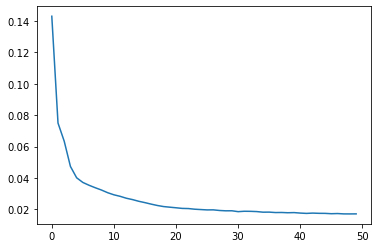

In [9]:
plt.plot(history.history['loss'])

In [4]:
X_test_pred = autoencoder.predict(X_test)
X_test_pred = scalar.inverse_transform(X_test_pred)
X_test = scalar.inverse_transform(X_test)
test_err = X_test_pred - X_test

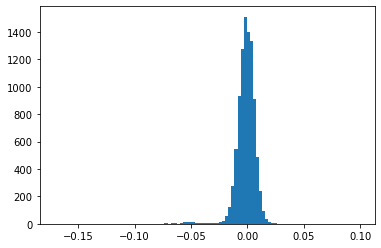

In [5]:
plt.hist(test_err.to_numpy()[:, 0], bins=100)
plt.show()

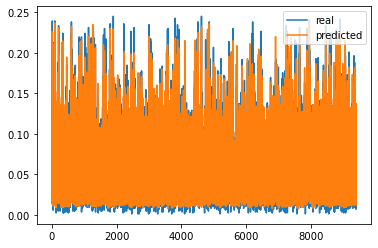

In [6]:
dim = 3
fig = plt.figure(figsize=(30, 5))
plt.plot(X_test.values[:, dim], label='real')
plt.plot(X_test_pred[:, dim], label='predicted')
plt.legend()
plt.show()